<a href="https://colab.research.google.com/github/rambadade32/Dog_breed_classifier/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Dog Vision

Dog vision is a Multiclass Dog Breed classifier .
we're using tensorflow 2.x ,tensorflow Hub for this project 


# Approach 
we're following the Deep Learning Workflow Shown Below:
  1. Problem 
  2. Data
  3. Evaluation
  4. Features

## Problem
 when we found a dog on street and want to know which breed it is...

 we can find many dog breeds types .


## Data
  we found this dataset on kaggle coompetation


  We've Multi-class dataset with 10k+ training and 10k+ Testing Images with 120 types of breeds.
we also have csv file of labes

In [ ]:
#!unzip "drive/MyDrive/Machine learning/Dog vision project/Data/dog-breed-identification.zip" -d"drive/MyDrive/Machine learning/Dog vision project"

In [ ]:
# import tensorflow directoray
import tensorflow as tf
print("Tensorflow version :",tf.__version__)
import tensorflow_hub as hub
print("Tensorflow hub version :",hub.__version__)
print('GPU',"(YESS AVAILABLE!!!!!)" if tf.config.list_logical_devices("GPU") else "NOT Available :(")

Tensorflow version : 2.4.1
Tensorflow hub version : 0.11.0
GPU NOT Available :(


# Getting our Data Ready


## Loading Data Lables
 for fast computations on gpu we'll turn our data into tensors

 
there is csv format files for labels in our dataset so we're using pandas library


In [ ]:
# Checkout the labels of our data
import pandas as pd

labels_csv = pd.read_csv("drive/MyDrive/Machine learning/Dog vision project/labels.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels_csv.describe()


,id,breed
count,10222,10222
unique,10222,120
top,4bafa4d48d31c4291c67a7f29b64aed4,scottish_deerhound
freq,1,126


In [ ]:
  labels_csv.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


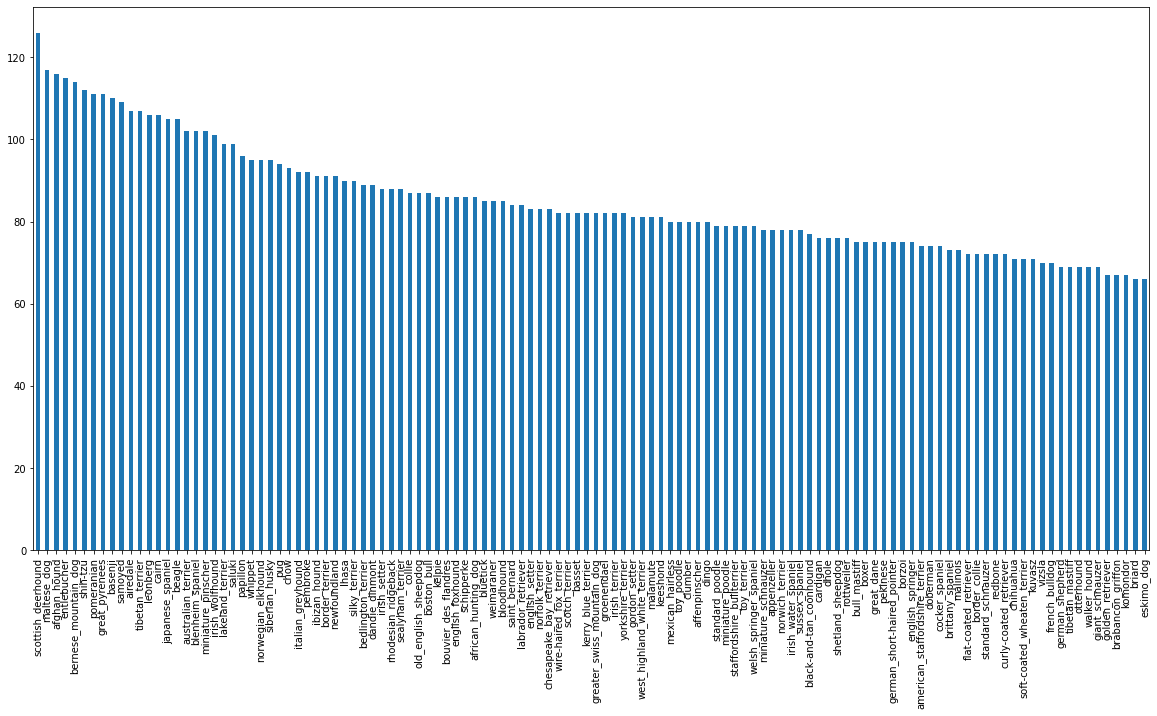

In [ ]:
# Images in each Breed
labels_csv.breed.value_counts().plot.bar(figsize=(20,10))

In [ ]:
#Average images in our each breed
labels_csv.breed.value_counts().median()

82.0

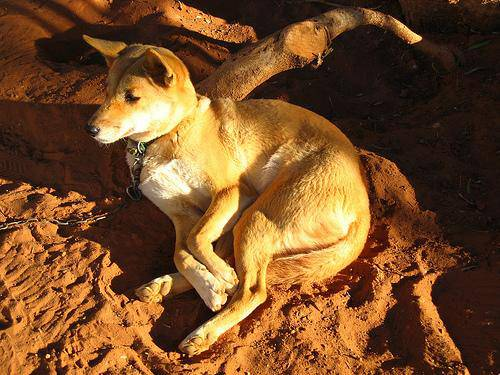

In [ ]:
# let's see image
from IPython.display import Image
Image("drive/MyDrive/Machine learning/Dog vision project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting Images and their labels
we've csv file in dataframe ,so we'll take image ids from it and create a file path to our images using filenames

In [ ]:
# create Pathnames from Image ID's
filenames = ["/content/drive/MyDrive/Machine learning/Dog vision project/train/"+fname + ".jpg" for fname in labels_csv.id]

# check the first 10.
filenames[:10]

['/content/drive/MyDrive/Machine learning/Dog vision project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Machine learning/Dog 

In [ ]:
# check whether the number of filenames matches numbe of actual image files
# if they do not matches then there is some problem with our data extraction (in colab while unzipping a file on drive)
#this became problematic while Training 
import os
if len(os.listdir("drive/My Drive/Machine learning/Dog vision project/train/"))==len(filenames):
    print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files,check the target directory")

Filenames match actual amount of files!!! Proceed.


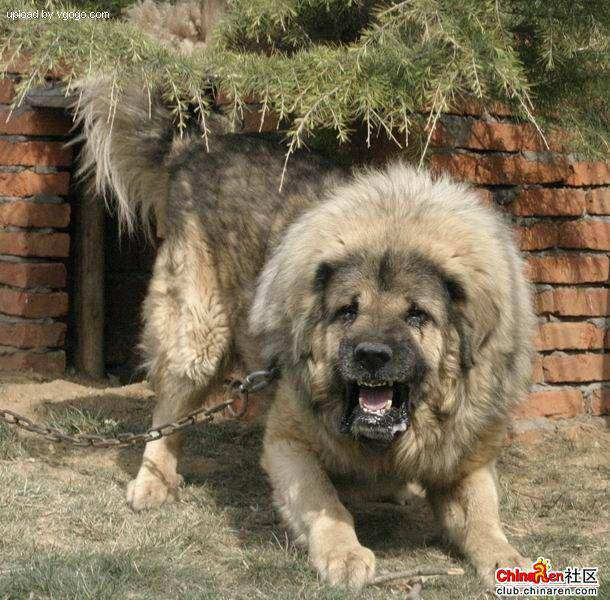

In [ ]:
#check our image with filenames
Image(filenames[9000])

In [ ]:
labels_csv.breed[9000]

'tibetan_mastiff'

In [ ]:
#
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# see if missing data... 

if len(labels) == len(filenames):
  print("Number of labels matches with number of filenames")
else:
  print("Number of labels does not match with the number of filenames,check data directory")

Number of labels matches with number of filenames


In [ ]:
# find the unique label values
unique_breeds  = np.unique(labels)
len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
labels[:50]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound', 'shetland_sheepdog', 'walker_hound',
       'maltese_dog', 'bluetick', 'norfolk_terrier',
       'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone',
       'lakeland_terrier', 'boxer', 'doberman', 'otterhound',
       'otterhound', 'bedlington_terrier', 'dingo', 'golden_retriever',
       'standard_schnauzer', 'irish_water_spaniel',
       'black-and-tan_coonhound', 'cairn', 'affenpinscher',
       'labrador_retriever', 'ibizan_hound', 'english_setter',
       'walker_hound', 'weimaraner', 'giant_schnauzer',
       'golden_retriever', 'boston_bull', 'groenendael',
       'lakeland_terrier', 'irish_water_spaniel', 'dhole', 'dingo',
       'affenpinscher', 'toy_poodle', 'border_terrier',
       'lakeland_terrier', 'tibetan_terrier', 'norwegian_elkhound'],
      dtype=object)

In [ ]:
#Turn single label into array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
#Turn every Labes into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example : Turning boolean array into integers
print(labels[0]) #Original label
print(np.where(unique_breeds == labels[0]))#Index where label occurs 
print(boolean_labels[0].argmax()) # Index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #There will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['/content/drive/MyDrive/Machine learning/Dog vision project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Machine learning/Dog 

## Creating Own validation set
 since the validation isn't there in the kaggle dataset

In [ ]:
# set up X & y variables
X = filenames
y = boolean_labels

In [ ]:
X[:5]

['/content/drive/MyDrive/Machine learning/Dog vision project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Machine learning/Dog vision project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
y[:5]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

we're going to start off experimenting with ~100 images and increase as needed

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [ ]:
# Spliting our data into traning and validation set 
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size = 0.2,
                                               random_state=42)

In [ ]:
len(X_train),len(y_train),len(y_val),len(X_val)

(800, 800, 200, 200)

## Preprossing Data

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `image` (a jpeg file) into Tensors.
4. Resize the `image` to be of shape (224, 224).
5. Return the modified `image`.

In [ ]:
IMG_SIZE=224
#filenames,image_size =IMG_SIZE
def process_image(image_path):
  '''
  This function takes an image and convert into tensors for fast computations 
  '''
  image = tf.io.read_file(image_path)

  # Turn jpg image into Tensors
  image = tf.image.decode_jpeg(image,channels=3)

  # convert rgb channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image,tf.float32)
  #Resize image to our desired size 224,224
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

## Creating Data Batch function

In [ ]:
# create a simple function to give us a tuple (image,label)
def get_image_label(image_path,label):
  """
  takes input image path
  """
  image = process_image(image_path)
  return image,label


In [ ]:
# batch function 
BATCH_SIZE = 32

def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches out of data image (X) & labels (y) pairs,
  Shuffles data if it's train data but doesn't shuffle if it's validation data.
  it also accept teat data (No labels)


  """
  if test_data:
    print("Creating test batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
 
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating Trainiiig data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [ ]:
#creating training and validation data batches
val_data = create_data_batches(X_val,y_val,valid_data=True)
train_data = create_data_batches(X_train,y_train)

Creating validation data batches...
Creating Trainiiig data batches...


In [ ]:
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

# Vizualize our data
As our train and val data batch is ready and we've our data in tensor tuples image,label  
 Let's vizualise it...

In [ ]:
import matplotlib.pyplot as plt

#create a function for viewing 25 images
def show_25_images(images,labels):
  #create figzise
  figure =plt.figure(figsize=(10,10))
  for i in range(25):
    # create subplots of 5rows and 5 columns
    ax = plt.subplot(5, 5, i+1)
    #Display images
    plt.imshow(images[i])

    plt.title(unique_breeds[labels[i].argmax()])  
    plt.axis("off")

In [ ]:
import numpy as np


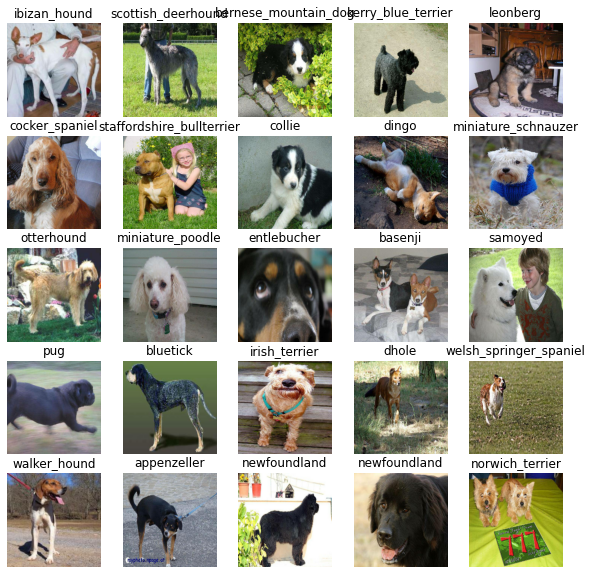

In [ ]:
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

In [ ]:
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Creating a Training Model


In [ ]:
# setting uo with input,output and model url
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# creating a function to build ,compile a model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  """
  
  """
  print("Creating a model with ",MODEL_URL)
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])
  
  model.compile(optimizer="Adam",
                loss = "categorical_crossentropy",
                metrics="accuracy")
  
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model = create_model()
model.summary()

## callbacks
we're making 2 callbacks:
1. for tensorboard to track our accuracy and loss
2. for Early Stopping 

### 1. Tensorboard Callback

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

Load the TensorBoard notebook extension.
Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
Visualize the our models training logs using the `%tensorboard` magic function

In [ ]:
%load_ext tensorboard

import os
import datetime

In [ ]:
# Create call back function 

def create_tensorboardcallback():
  logdir = os.path.join("drive/MyDrive/logs",
                        datetime.datetime.now().strftime("%Y%m%D-%H%M%S")
                        )
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                 patience=3
                                 )

## Trainig a Model(on subset)

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,stepsize:10}

In [ ]:
# Creating a function to train our model

def train_model():
  model = create_model()

  tensorboard = create_tensorboardcallback()

  model.fit(x=train_data,batch_size=BATCH_SIZE,
            validation_data = val_data,
            epochs=NUM_EPOCHS,
            validation_freq= 1,callbacks=[tensorboard,early_stopping])
  return model


#fit our model to data
model = train_model()

model.save("/content/drive/MyDrive/Dog vision project/models/mobnet.h5")

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

model_1000_images = load_model('drive/My Drive/Dog vision project/models/20210131-09171612084664-1000-images-Adam.h5')

## making And Evaluating Prediction using a trained model 

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ vision\ project/logs

In [ ]:
predictions = model.predict(val_data,verbose=1)
predictions

In [ ]:
predictions[0] 
print("MAX value(probability):",np.max(predictions[0]))
print("Max index:",np.argmax(predictions[0]))
print("sum of all elements:",np.sum(predictions[0]))
print("labels:",unique_breeds[np.argmax(predictions[0])])

MAX value(probability): 0.0972262
Max index: 103
sum of all elements: 1.0000001
labels: soft-coated_wheaten_terrier


In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'soft-coated_wheaten_terrier'

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

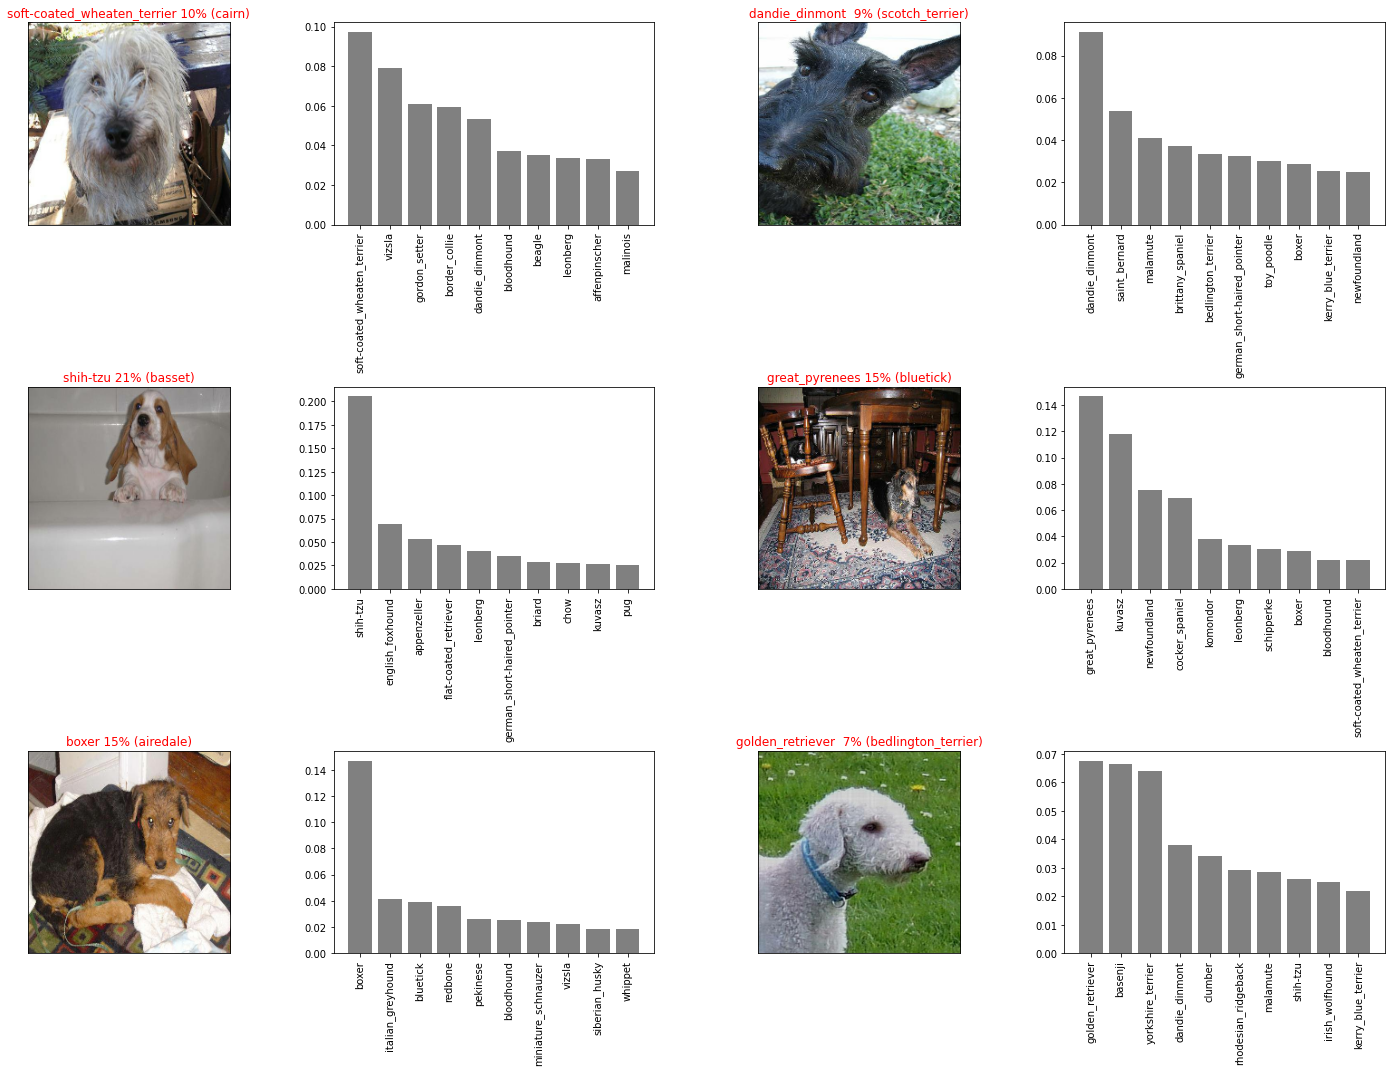

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
model.evaluate(val_data)

In [ ]:
model_1000_images.evaluate(val_data)

## Trainig on full data

In [ ]:
full_data = create_data_batches(X,y)

In [ ]:
full_model = create_model()

In [ ]:
# Creating full model callbacks

# Tensorboard callback

full_model_tensorboard = create_tensorboardcallback()

#Early stopping callback for full model
full_model_earlystopping = tf.keras.callbacks.EarlyStopping('accuracy',patience = 3)

In [ ]:
%tensorboard --logdir drive/MyDrive/logs

In [ ]:
# Fit full model on full training data
#full_model.fit(x=full_data,epochs=NUM_EPOCHS,
               callbacks = [full_model_tensorboard,  
                            full_model_earlystopping])


In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
save_model(full_model, suffix="all-images-Adam")

In [ ]:
full_clf=load_model("drive/My Drive/Data/models/20210131-15531612108432-all-images-Adam.h5")

In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/My Drive/Machine learning/Dog vision project/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

In [ ]:
len(test_filenames)

In [ ]:
test_data = create_data_batches(X=test_filenames,test_data=True)

In [ ]:
test_predictions = full_clf.predict(test_data,verbose=1)

In [ ]:
test_predictions[:5]

In [ ]:
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "drive/My Drive/Machine learning/Dog vision project/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
preds_df.to_csv("drive/My Drive/full_submission_1_mobilienetV2_adam.csv",
                 index=False)